## Библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Постановка задачи

In [2]:
global_temp = pd.read_csv('data/GlobalTemperatures.csv')

In [3]:
global_temp = global_temp[['dt', 'LandAverageTemperature']]

global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['year'] = global_temp['dt'].map(lambda x: x.year)
global_temp['month'] = global_temp['dt'].map(lambda x: x.month)

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)

global_temp['season'] = global_temp['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['LandAverageTemperature'].mean())

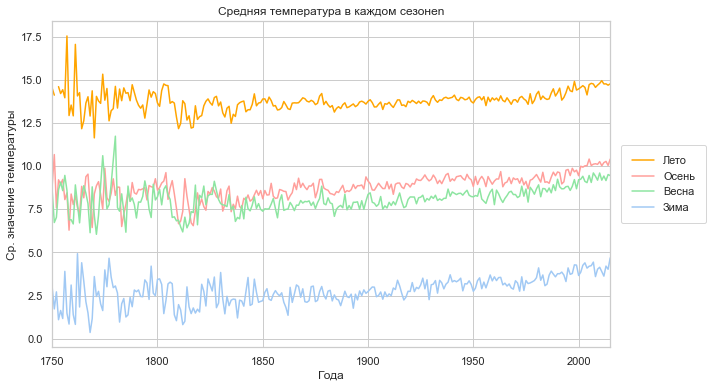

In [4]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Лето', color='orange')
plt.plot(years, autumn_temps, label='Осень', color='r')
plt.plot(years, spring_temps, label='Весна', color='g')
plt.plot(years, winter_temps, label='Зима', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Ср. значение температуры')
ax.set_xlabel('Года')
ax.set_title('Средняя температура в каждом сезонеn')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

In [5]:
temp_by_country = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv')
countries = temp_by_country['Country'].unique()

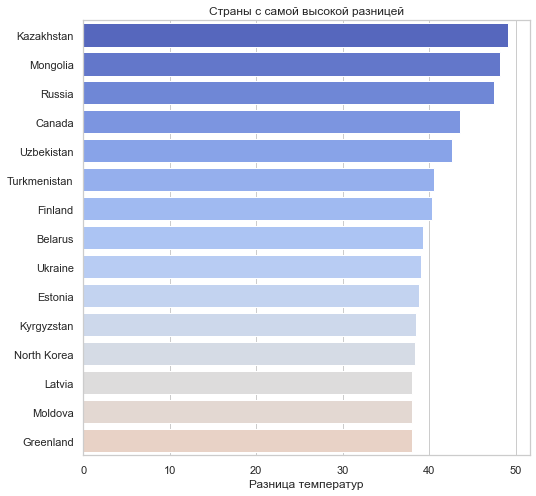

In [6]:
max_min_list = []

# getting max and min temps
for country in countries:
    curr_temps = temp_by_country[temp_by_country['Country'] == country]['AverageTemperature']
    max_min_list.append((curr_temps.max(), curr_temps.min()))
    
# nan cleaning
res_max_min_list = []
res_countries = []

for i in range(len(max_min_list)):
    if not np.isnan(max_min_list[i][0]):
        res_max_min_list.append(max_min_list[i])
        res_countries.append(countries[i])

# calc differences        
differences = []

for tpl in res_max_min_list:
    differences.append(tpl[0] - tpl[1])
    
# sorting
differences, res_countries = (list(x) for x in zip(*sorted(zip(differences, res_countries), key=lambda pair: pair[0], reverse=True)))

# ploting
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=differences[:15], y=res_countries[:15], palette=sns.color_palette("coolwarm", 25), ax=ax)

texts = ax.set(ylabel="", xlabel="Разница температур", title="Страны с самой высокой разницей")

## Разведочный анализ данных

In [7]:
cities = pd.read_csv('data/GlobalLandTemperaturesByCity.csv', sep=",")

In [8]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [9]:
cities.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

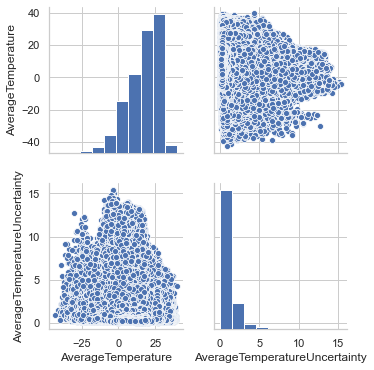

In [10]:
sns.pairplot(cities)

In [11]:
mos = cities.loc[cities['City'] == 'Moscow', ['dt','AverageTemperature']]
mos.columns = ['Date','Temp']
mos['Date'] = pd.to_datetime(mos['Date'])
mos.reset_index(drop=True, inplace=True)
mos.set_index('Date', inplace=True)

mos = mos.loc['1900':'2013-01-01']
mos = mos.asfreq('M', method='bfill')
mos.head()

,Temp
Date,
1900-01-31,-10.109
1900-02-28,-4.419
1900-03-31,2.300
1900-04-30,9.853
1900-05-31,13.814


In [12]:
mos.shape

(1356, 1)

In [13]:
mos.columns

Index(['Temp'], dtype='object')

In [14]:
mos.dtypes

Temp    float64
dtype: object

In [15]:
mos.isnull().sum()

Temp    0
dtype: int64

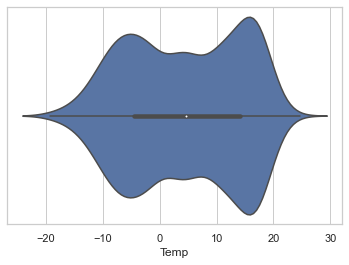

In [16]:
# Скрипичные диаграммы для числовых колонок
for col in ['Temp']:
    sns.violinplot(x=mos[col])
    plt.show()

## Основная часть

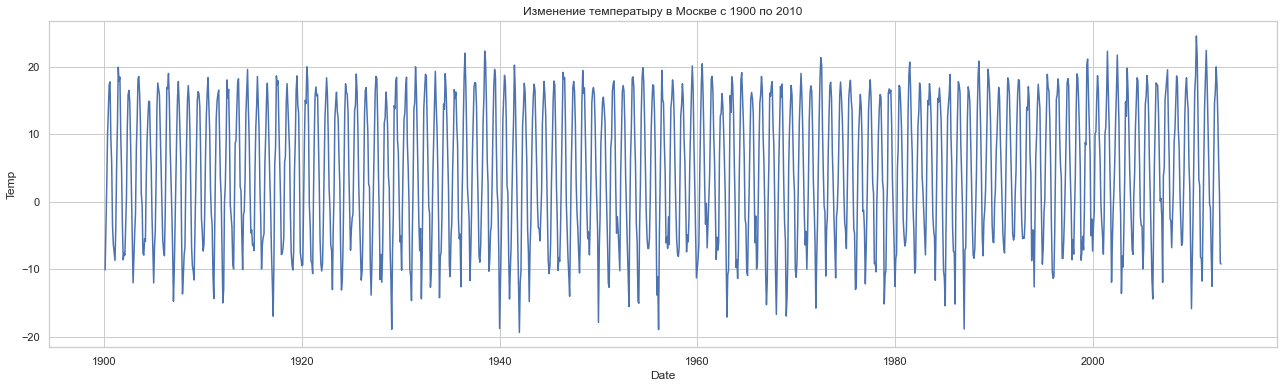

In [17]:
plt.figure(figsize=(22,6))
sns.lineplot(x=mos.index, y=mos['Temp'])
plt.title('Изменение температыру в Москве с 1900 по 2010')
plt.show()

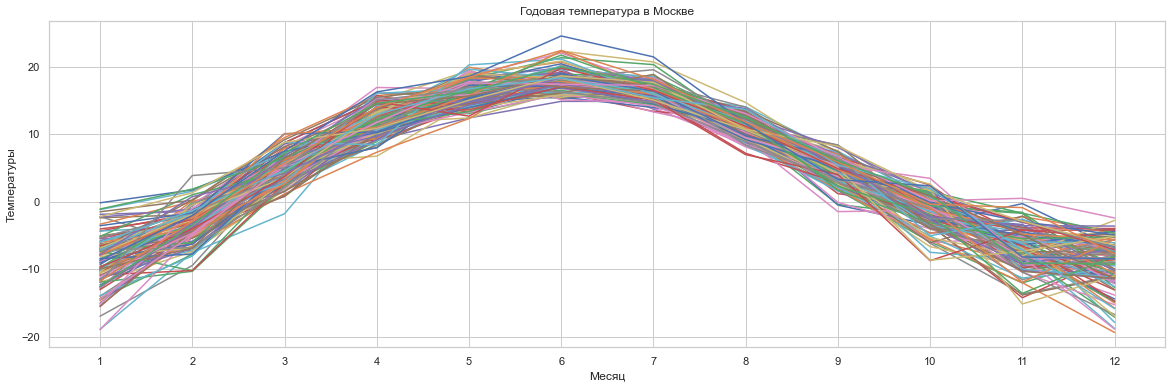

In [18]:
mos['month'] = mos.index.month
mos['year'] = mos.index.year
pivot = pd.pivot_table(mos, values='Temp', index='month', columns='year', aggfunc='mean')
pivot.plot(figsize=(20,6))
plt.title('Годовая температура в Москве')
plt.xlabel('Месяц')
plt.ylabel('Температуры')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

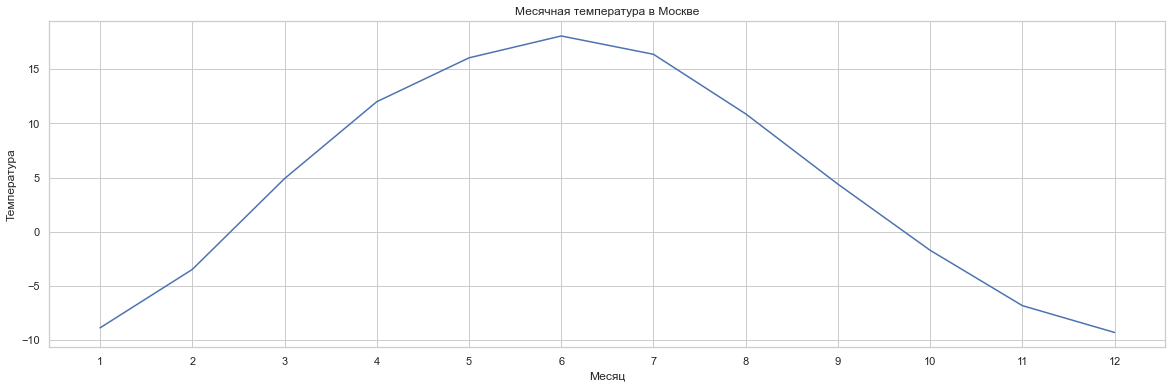

In [19]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Месячная температура в Москве')
plt.xlabel('Месяц')
plt.ylabel('Температура')
plt.xticks([x for x in range(1,13)])
plt.show()

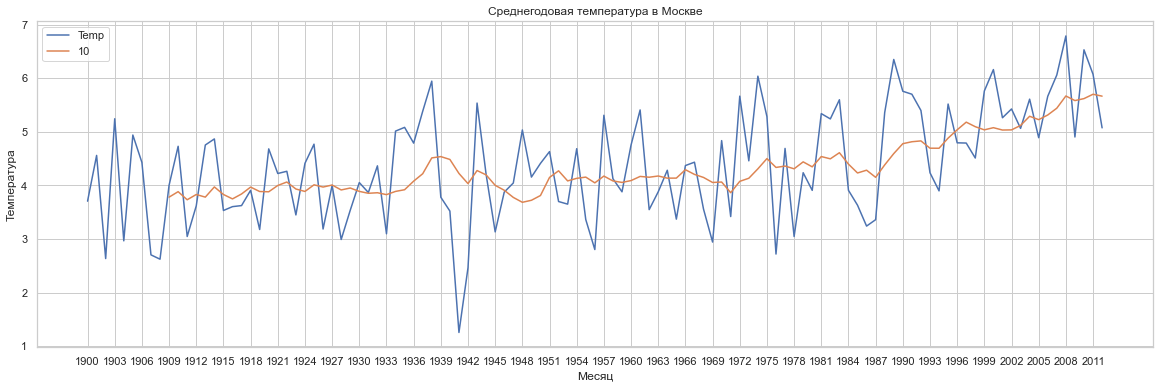

In [20]:
year_avg = pd.pivot_table(mos, values='Temp', index='year', aggfunc='mean')
year_avg['10'] = year_avg['Temp'].rolling(10).mean()
year_avg[['Temp','10']].plot(figsize=(20,6))
plt.title('Среднегодовая температура в Москве')
plt.xlabel('Месяц')
plt.ylabel('Температура')
plt.xticks([x for x in range(1900,2012,3)])
plt.show()

In [21]:
train = mos[:-60].copy()
val = mos[-60:-12].copy()
test = mos[-12:].copy()

In [22]:
baseline = val['Temp'].shift()
baseline.dropna(inplace=True)
baseline.head()

Date
2008-02-29    -2.197
2008-03-31     1.340
2008-04-30     8.806
2008-05-31    10.868
2008-06-30    15.058
Freq: M, Name: Temp, dtype: float64

In [23]:
def measure_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true,y_pred))

rmse_base = measure_rmse(val.iloc[1:,0],baseline)
print(f'RMSE baseline, которую мы будем пытаться уменьшить, составляет {round(rmse_base,4)} градус Цельсия')

RMSE базовой линии, которую мы будем пытаться уменьшить, составляет 5.9605 градус Цельсия


In [24]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Изменения температуры в Москве')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Диаграмма распределения')

    plt.tight_layout()
    
    print('Результаты теста:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Статистика теста','p-величина','Использовано лагов','Количество использованных наблюдений'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Критическое значение (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nСтатистика теста ниже критического значения 5%.\nРяд стационарна')
    else:
        print("\nСтатистика теста выше критического значения 5%.\nРяд не стационарна")

Результаты теста:
Статистика теста                          -5.4123
p-величина                                 0.0000
Использовано лагов                        23.0000
Количество использованных наблюдений    1272.0000
Критическое значение (1%)                 -3.4355
Критическое значение (5%)                 -2.8638
Критическое значение (10%)                -2.5680
dtype: float64

Статистика теста ниже критического значения 5%.
Ряд стационарна


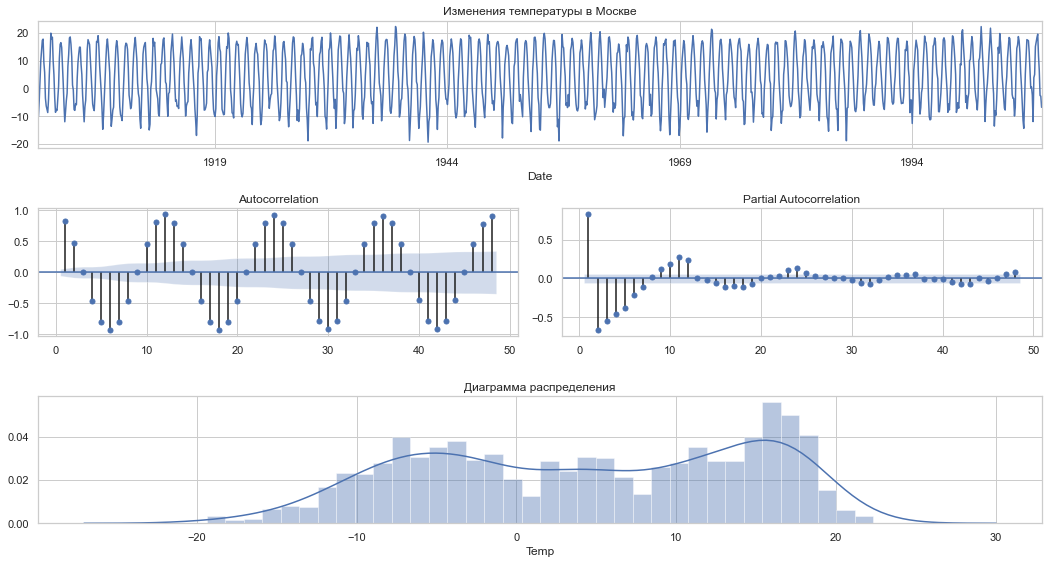

In [25]:
check_stationarity(train['Temp'])

Результаты теста:
Статистика теста                         -12.1908
p-величина                                 0.0000
Использовано лагов                        23.0000
Количество использованных наблюдений    1260.0000
Критическое значение (1%)                 -3.4356
Критическое значение (5%)                 -2.8638
Критическое значение (10%)                -2.5680
dtype: float64

Статистика теста ниже критического значения 5%.
Ряд стационарна


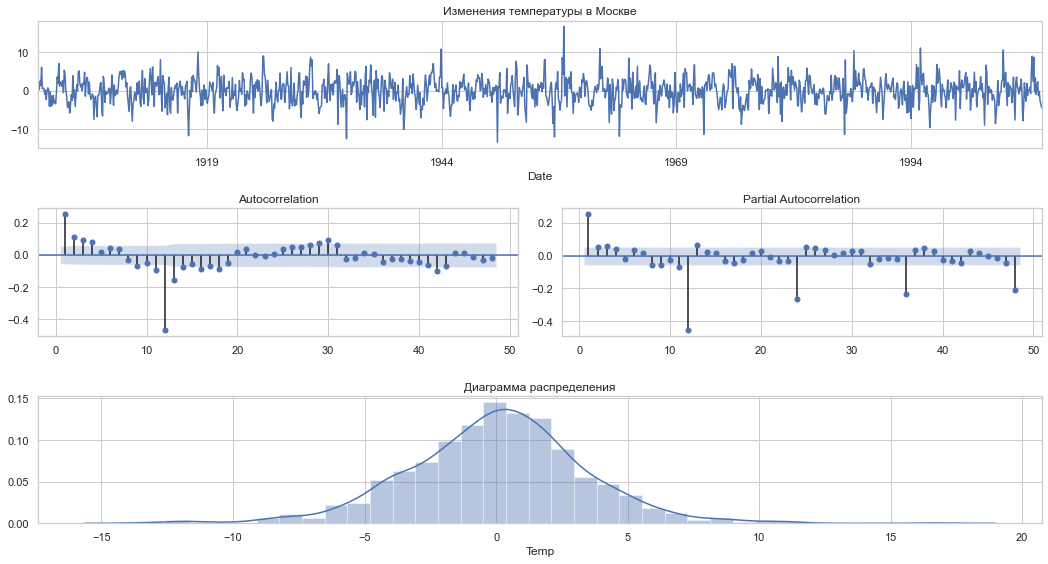

In [26]:
check_stationarity(train['Temp'].diff(12).dropna())

In [27]:
def walk_forward(training_set, validation_set, params):
    '''
    Параметры: это кортеж, в котором мы собрали следующие параметры SARIMA: ((pdq), (PDQS), trend)
    '''
    history = [x for x in training_set.values]
    prediction = list()
    
    pdq, PDQS, trend = params

    for week in range(len(validation_set)):
        model = sm.tsa.statespace.SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend)
        result = model.fit(disp=False)
        yhat = result.predict(start=len(history), end=len(history))
        prediction.append(yhat[0])
        history.append(validation_set[week])
        
    return prediction

In [28]:
val['Pred'] = walk_forward(train['Temp'], val['Temp'], ((3,0,0),(0,1,1,12),'c'))

In [29]:
rmse_pred = measure_rmse(val['Temp'], val['Pred'])

print(f"Среднеквадратичное отклонение модели SARIMA(3,0,0),(0,1,1,12),'c' составило {round(rmse_pred,4)} градуса Цельсия")
print(f"Это снижение на среднеквадратичное отклонение равное {round((rmse_pred/rmse_base-1)*100,2)}%")

Среднеквадратичное отклонение модели SARIMA(3,0,0),(0,1,1,12),'c' составило 2.4881 градуса Цельсия
Это снижение на среднеквадратичное отклонение равное -58.26%


In [30]:
# Создание столбца ошибок
val['Error'] = val['Temp'] - val['Pred']

In [31]:
def plot_error(data, figsize=(20,8)):
    '''
    Сделаем 3 столбца: Temperature, Prediction, Error
    '''
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))

    ax1.plot(data.iloc[:,0:2])
    ax1.legend(['Real','Pred'])
    ax1.set_title('Current and Predicted Values')

    ax2.scatter(data.iloc[:,1], data.iloc[:,2])
    ax2.set_xlabel('Предсказанные значения')
    ax2.set_ylabel('Ошибки')
    ax2.set_title('Отношение ошибок к предсказанным величинам')

    sm.graphics.qqplot(data.iloc[:,2], line='r', ax=ax3)

    plot_acf(data.iloc[:,2], lags=(len(data.iloc[:,2])-1),zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

In [32]:
# Удаляем некоторые столбцы для построения графиков
val.drop(['month','year'], axis=1, inplace=True)
val.head()

,Temp,Pred,Error
Date,,,
2008-01-31,-2.197,-7.692289,5.495289
2008-02-29,1.340,-0.934842,2.274842
2008-03-31,8.806,6.896832,1.909168
2008-04-30,10.868,13.796154,-2.928154
2008-05-31,15.058,16.519870,-1.461870


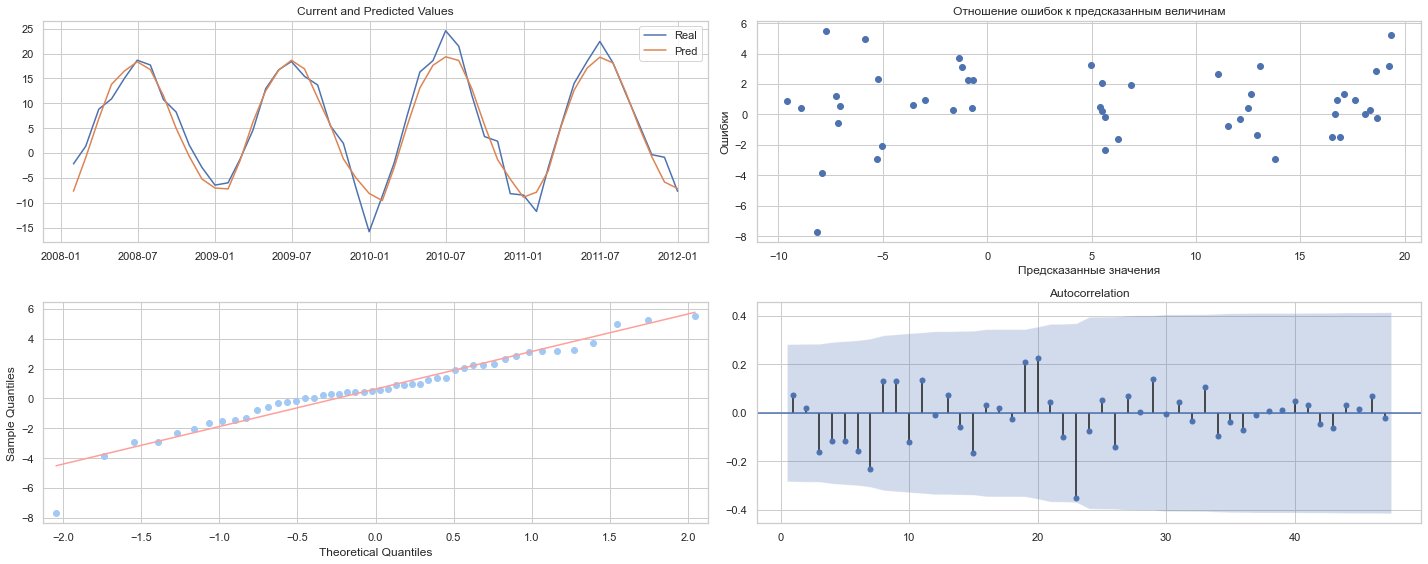

In [33]:
plot_error(val)

In [34]:
# Создание нового конкатенации обучающего и проверочного набора:
future = pd.concat([train['Temp'], val['Temp']])
future.head()

Date
1900-01-31   -10.109
1900-02-28    -4.419
1900-03-31     2.300
1900-04-30     9.853
1900-05-31    13.814
Name: Temp, dtype: float64

In [35]:
# Используем те же параметры подогнанной модели
model = sm.tsa.statespace.SARIMAX(future, order=(3,0,0), seasonal_order=(0,1,1,12), trend='c')
result = model.fit(disp=False)

In [36]:
test['Pred'] = result.predict(start=(len(future)), end=(len(future)+13))

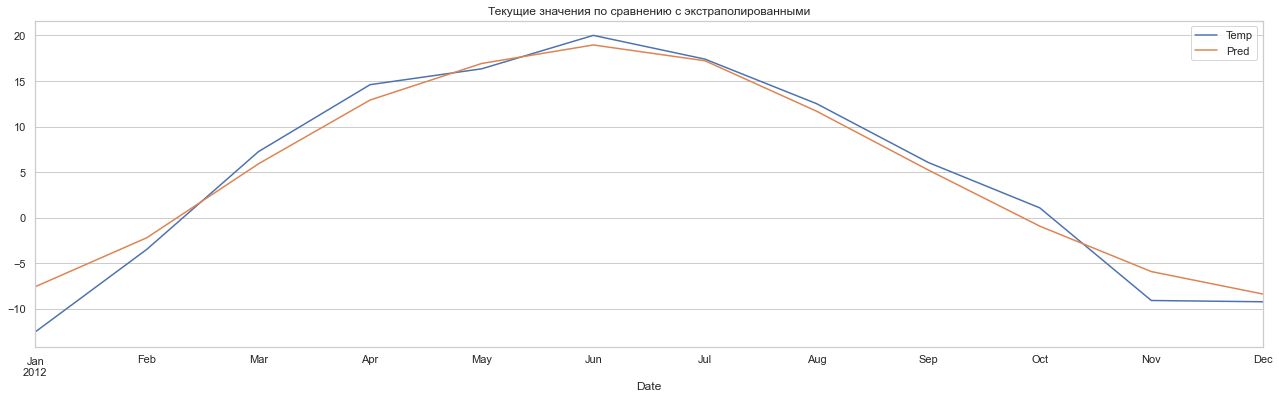

In [37]:
test[['Temp', 'Pred']].plot(figsize=(22,6))
plt.title('Текущие значения по сравнению с экстраполированными')
plt.show()

In [40]:
test_baseline = test['Temp'].shift()

test_baseline[0] = test['Temp'][0]

rmse_test_base = measure_rmse(test['Temp'],test_baseline)
rmse_test_extrap = measure_rmse(test['Temp'], test['Pred'])

print(f'RMSE baseline для теста baseline составило {round(rmse_test_base,2)} градуса Цельсия')
print(f'RMSE baseline для теста экстраполяции составило {round(rmse_test_extrap,2)} градуса Цельсия')
print(f'Улучшение состовляет {-round((rmse_test_extrap/rmse_test_base-1)*100,2)}%')

RMSE baseline для теста baseline составило 6.24 градуса Цельсия
RMSE baseline для теста экстраполяции составило 2.01 градуса Цельсия
Улучшение состовляет 67.81%
